In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import svm, datasets
import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
sd = pd.read_csv('strongdrink.txt')
Xvars = sd.ix[:, (1, 2, 6, 10)].values
yvals = sd.ix[:, 0].values
sd.head()

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


(a)

<IPython.core.display.Javascript object>


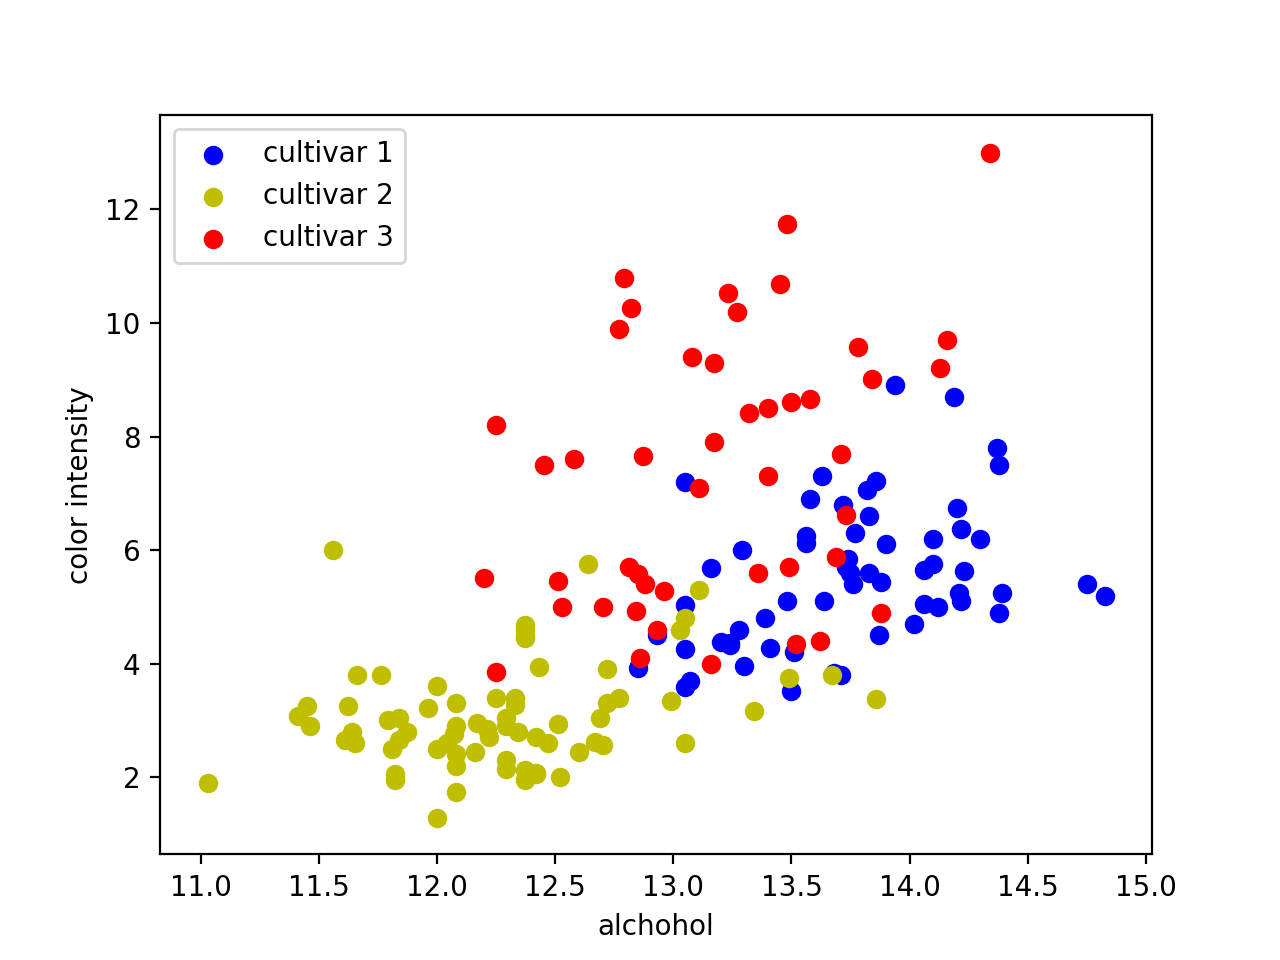

In [3]:
type1 = sd[sd.cultivar == 1]
type2 = sd[sd.cultivar == 2]
type3 = sd[sd.cultivar == 3]
x1 = type1['alco']
y1 = type1['color_int']
x2 = type2['alco']
y2 = type2['color_int']
x3 = type3['alco']
y3 = type3['color_int']
plt.scatter(x1, y1, c='b')
plt.scatter(x2, y2, c='y')
plt.scatter(x3, y3, c='r')
plt.xlabel('alchohol')
plt.ylabel('color intensity')
plt.legend(('cultivar 1', 'cultivar 2', 'cultivar 3'))
plt.show()

(b)

In [4]:
Xvars = sd.ix[:, (1, 2, 6, 10)].values
yvals = sd.ix[:, 0].values
k = 4
clf_mlog = KFold(n_splits=4, shuffle=True, random_state=22)
clf_mlog.get_n_splits(Xvars)

MSE_vec_kf = np.zeros(k)
c_lst = []
mse_lst = []
for train_index, test_index in clf_mlog.split(Xvars):
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
k_ind = int(0)
for c in np.arange(0.01, 1, 0.01):
    MSE_vec_kf = np.zeros(k)
    for train_index, test_index in clf_mlog.split(Xvars):
        X_train, X_test = Xvars[train_index], Xvars[test_index]
        y_train, y_test = yvals[train_index], yvals[test_index]
        MultLogReg = LogisticRegression(C=c, multi_class='multinomial',
                                solver='newton-cg')
        MultLogReg.fit(X_train, y_train)
        y_pred = MultLogReg.predict(X_test)
        LogReg = LogisticRegression()
        LogReg.fit(X_train, y_train)
        y_pred = LogReg.predict(X_test)
        MSE_vec_kf[k_ind] = ((y_test - y_pred) ** 2).mean()
        if k == 3:
            break
        
    MSE_kf = MSE_vec_kf.mean()
    c_lst.append(c)
    mse_lst.append(MSE_kf)
low_mse = min(mse_lst)
low_index = mse_lst.index(low_mse)
c_low = c_lst[low_index]
print('You can only use l2 as panelty when using newton-cg as solver.')
print('The lowest MSE is obtained when c =', c_low, 'and the lowest MSE is', low_mse)

You can only use l2 as panelty when using newton-cg as solver.
The lowest MSE is obtained when c = 0.01 and the lowest MSE is 0.06818181818181818


(c)

In [8]:
params = []
MSEs = []
for n_es in range(100, 500, 100):
    for m_d in range(1, 20):
        for m_l in range(1, 20):
            sd_cl = RandomForestClassifier(n_estimators=n_es, max_depth=m_d, min_samples_leaf=m_l, bootstrap=True,
                                           oob_score=True, random_state=22)
            sd_cl.fit(Xvars, yvals)
            mse = sd_cl.oob_score_
            params.append((n_es, m_d, m_l))
            MSEs.append(mse)
optimal_mse = min(MSEs)
opt_index = MSEs.index(optimal_mse)
opt_params = params[opt_index]
print('The lowest MSE is', optimal_mse, ", and it is obtained when n_estimator =", opt_params[0], ', max_depth=', 
     opt_params[1], ', min_sample_leaf=', opt_params[2])

The lowest MSE is 0.6875 , and it is obtained when n_estimator = 400 , max_depth= 1 , min_sample_leaf= 1


(d)

In [17]:
k = 4
clf_svm = KFold(n_splits=4, shuffle=True, random_state=22)

MSE_vec_svc = np.zeros(k)

MSE_lst3 = []
params_3 = []

for g in np.arange(0.1, 2, 0.1):
    for c in np.arange(0.1, 2, 0.1):
        k_ind = int(0)
        for train_index, test_index in clf_svm.split(Xvars):
            X_train, X_test = Xvars[train_index], Xvars[test_index]
            y_train, y_test = yvals[train_index], yvals[test_index]
            svc_rbf = svm.SVC(kernel='rbf', gamma = g, C=c)
            svc_rbf.fit(X_train, y_train)
            y_pred = svc_rbf.predict(X_test)
            MSE_vec_svc[k_ind] = ((y_test - y_pred) ** 2).mean()
            k_ind += 1
        MSE_svc = MSE_vec_svc.mean()
        MSE_lst3.append(MSE_svc)
        params_3.append((c, g))

MSE_opt3 = min(MSE_lst3)
opt_index3 = MSE_lst3.index(MSE_opt3)
c_opt3 = params_3[opt_index3][0]
g_opt3 = params_3[opt_index3][1]
print('The lowest MSE is', optimal_mse, ", and it is obtained when C=", c_opt3, 'gamma=',
      g_opt3)

The lowest MSE is 0.6875 , and it is obtained when C= 1.0 gamma= 1.7000000000000002


(e)

In [22]:
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
k=4
clf_mlp = KFold(n_splits=4, shuffle=True, random_state=22)
MSE4 = []
params4 = []

MSE_vec_svc = np.zeros(k)
for hlz in np.arange(100, 500, 100):
    for ac in ['identity', 'logistic', 'tanh', 'relu']:
        for al in np.arange(0, 1, 0.05):
            k_ind = int(0)
            for train_index, test_index in clf_svm.split(Xvars):
                X_train, X_test = Xvars[train_index], Xvars[test_index]
                y_train, y_test = yvals[train_index], yvals[test_index]
                mlp_cl = MLPClassifier(hidden_layer_sizes=(hlz, ), activation=ac, solver='lbfgs', alpha=al)
                mlp_cl.fit(X_train, y_train)
                MSE_vec_svc[k_ind] = 1-mlp_cl.score(X_test, y_test)
                k_ind += 1
        MSE_svc = MSE_vec_svc.mean()
        MSE4.append(MSE_svc)
        params4.append((hlz, ac, al))
MSE_opt4 = min(MSE4)
opt_index4 = MSE4.index(MSE_opt4)
opt_params = params3[opt_index4]
print('The lowest MSE is', MSE_opt4, ", and it is obtained when hidden_layer_sizes=",opt_params[0] , 'activation=',
      opt_params[1], 'and alpah=', opt_params[2])

(f)

LogisticRegression is the best model because it has lowest optimal MSE.